# DECISION TREE ALGORITHM.

Decision tree algorithm is a type of supervised machine learning model that classifies data by using true or false values to questions. It one of the simplest and most accurate model that when visualised gives a hierachial tree structure with three types of nodes ; root, internal node and leafs. Its a graphical representation showing all possible solutions for a given problem based on a condition. 

<center><img src="../images/decision tree.png" width=600px height=300px /></center>


The **root node** sits at the top as a starting point as parent, it represents the whole dataset or population from which a decision will be made resulting to a split. The root is the most critical part as it sets the foundation for branching aimed at making separations that give birth to child nodes with the highest purity.  

**Decision/internal nodes** are decisions upon which datasets are split. They are test conducted based on the features of the dataset. A question is asked and then based on the answers provided, a tree is split further into sub-branches. A split is characterised by a feature that best separates the data according to certain criterion i.e informtaion gain(entropy), Gini Impurity, and variance reduction.

**Leaf Node** is a final ouput node that represent an outcome made. These terminal node represent a point upon which no further split in the dataset can be made, here the tree is considered as fully grown. For classification trees they represent classes while in regression thet represent contionous values often mean values of the target variable. 

**Feature selection** is an important step in decison trees where all possible splits are considered and one that result to best feature separation based on a criterion is selected. A decision node is split into subnodes also called child nodes. In classifiction data is separated into classes while in regression variance is reduced. 

Sometimes unneccessary branches can be removed by **pruning**. These are ones that have little to no impact on the accuracy of the model, this step improve the model generalisation abilities on new data and curbs overfitting.

Lets use this algorithm to predict voter turn out in the United States county election.  

In [1]:
# Import Required libraries. 
import pandas as pd 
import geopandas as gpd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Distance measurements 
from shapely.geometry import LineString

# Machine learning 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, classification_report
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression

SHAPE OF POLYGON : (3108, 88) 
 COORDINATE REFERENCE SYSTEM : EPSG:3857


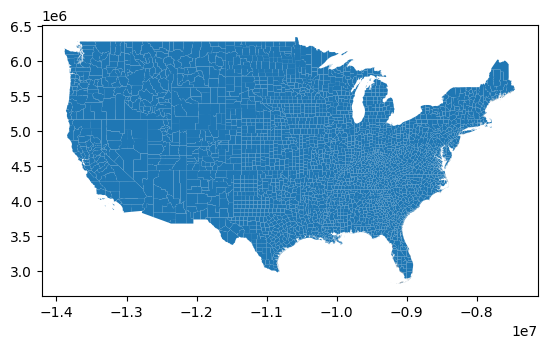

In [2]:
# Read and clean data.

# Read data containing county polygons. 
data = gpd.read_file('F:/Programs/Secrets of ML/Data/US_Elections.gpkg', layer='US_County_Elections_Projected')

#Reproject data 
data = data.to_crs(epsg=3857)
data.plot()

print(f'SHAPE OF POLYGON : {data.shape} \n COORDINATE REFERENCE SYSTEM : {data.crs}')


In [3]:
# Rename columns 

data.rename(columns={'county_f_1': 'county_FIPS',
                     'pop_sqmi':'population_persqmile',
                     'totalvotes':'totalvotes_2008',
                     'totalvot_1':'totalvotes_2012',
                     'totalvot_2':'totalvotes_2016',
                     'totalvot_3':'totalvotes_2020',
                     'cvap_est_2':'cvap_est_2008',
                     'cvap_est_3':'cvap_est_2012',
                     'cvap_est_4':'cvap_est_2016',
                     'cvap_est_5':'cvap_est_2020',
                     'voter_turn':'voter_turnout_2008',
                     'voter_tu_1':'voter_turnout_2012',
                     'voter_tu_2':'voter_turnout_2016',
                     'voter_tu_3':'voter_turnout_2020',
                     'voter_tu_4':'voter_turnout_dem_2008',
                     'voter_tu_5':'voter_turnout_dem_2012',
                     'voter_tu_6':'voter_turnout_dem_2016',
                     'voter_tu_7':'voter_turnout_dem_2020',
                     'voter_tu_8':'voter_turnout_gop_2008',
                     'voter_tu_9':'voter_turnout_gop_2012',
                     'voter_t_10':'voter_turnout_gop_2016',
                     'voter_t_11':'voter_turnout_gop_2020',
                     'pctdiff_de':'per_diff_dem_vs_gop_2008',
                     'pctdiff__1':'per_diff_dem_vs_gop_2012',
                     'pctdiff__2':'per_diff_dem_vs_gop_2016',
                     'pctdiff__3':'per_diff_dem_vs_gop_2020',
                     'rawdiff_de':'rawdiff_dem_vs_gop_2008',
                     'rawdiff__1':'rawdiff_dem_vs_gop_2012',
                     'rawdiff__2':'rawdiff_dem_vs_gop_2016',
                     'rawdiff__3':'rawdiff_dem_vs_gop_2020',
                     'winning_pa':'winning_party_2008',
                     'winning__1':'winning_party_2008',
                     'winning__2':'winning_party_2008',
                     'winning__3':'winning_party_2008',
                     'gender_MED':'2022_median_age',
                     'householdi':'2022_per_capitalincome',
                     'educationa':'perc_2022_age_25+_no_diploma/highschool',
                     'households':'perc_2022_income_below_povertyline',
                     'educatio_1':'perc_2022_age_25+_with_bachelors_degree',
                     'disposable':'2022_avg_disposable_income',
                     'househol_1':'2022_average_houshold_income',
                     'financial1':'2022_avg_credit_card_debt'
                     },inplace=True)

print(data.columns)

Index(['county_fip', 'fips', 'name', 'population', 'population_persqmile',
       'sqmi', 'state_abbr', 'state_fips', 'state_name', 'county_FIPS',
       'totalvotes_2008', 'totalvotes_2012', 'totalvotes_2016',
       'totalvotes_2020', 'cvap_est_2008', 'cvap_est_2012', 'cvap_est_2016',
       'cvap_est_2020', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'voter_turnout_2020', 'voter_turnout_dem_2008',
       'voter_turnout_dem_2012', 'voter_turnout_dem_2016',
       'voter_turnout_dem_2020', 'voter_turnout_gop_2008',
       'voter_turnout_gop_2012', 'voter_turnout_gop_2016',
       'voter_turnout_gop_2020', 'per_diff_dem_vs_gop_2008',
       'per_diff_dem_vs_gop_2012', 'per_diff_dem_vs_gop_2016',
       'per_diff_dem_vs_gop_2020', 'rawdiff_dem_vs_gop_2008',
       'rawdiff_dem_vs_gop_2012', 'rawdiff_dem_vs_gop_2016',
       'rawdiff_dem_vs_gop_2020', 'winning_party_2008', 'winning_party_2008',
       'winning_party_2008', 'winning_party_2008', 'aggregatio', 

In [4]:
data.head(2)

county_fip   fips            name  population  population_persqmile  \
0        001  01001  Autauga County       58805                  97.3   
1        003  01003  Baldwin County      231767                 141.9   

      sqmi state_abbr state_fips state_name county_FIPS  ...  lifemode_9  \
0   604.37         AL         01    Alabama       01001  ...         0.0   
1  1633.14         AL         01    Alabama       01003  ...         0.0   

   lifemod_10  lifemod_11  lifemod_12  lifemod_13  lifemod_14  region  \
0         1.7         0.0         0.0        0.00           4   South   
1         1.3         0.0         0.0        9.41          10   South   

      Shape_Leng    Shape_Area  \
0  210565.076897  1.566620e+09   
1  955774.304440  4.249259e+09   

                                            geometry  
0  MULTIPOLYGON (((-9619464.071 3856528.446, -961...  
1  MULTIPOLYGON (((-9742872.755 3543445.886, -974...  

[2 rows x 88 columns]

In [5]:
# Read cities data 

cities_10 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_10.shp")
cities_9 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_9.shp")
cities_8 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_8.shp")
cities_7 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_7.shp")
cities_6 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_6.shp")

# Reproject 
cities_10 = cities_10.to_crs(epsg=3857)
cities_9 = cities_9.to_crs(epsg=3857)
cities_8 = cities_8.to_crs(epsg=3857)
cities_7 = cities_7.to_crs(epsg=3857)
cities_6 = cities_6.to_crs(epsg=3857)

# Rename columns 
cities_10.rename(columns={"PLACEFIPS": 'city_FIPS'},inplace=True) 
cities_9.rename(columns={"PLACEFIPS": 'city_FIPS'},inplace=True) 
cities_8.rename(columns={"PLACEFIPS": 'city_FIPS'},inplace=True) 
cities_7.rename(columns={"PLACEFIPS": 'city_FIPS'},inplace=True) 
cities_6.rename(columns={"PLACEFIPS": 'city_FIPS'},inplace=True) 

# Export 
cities_10.to_file('F:/Programs/Secrets of ML/Data/US_Elections.gpkg', layer='US_Cities10', driver="GPKG")
cities_9.to_file('F:/Programs/Secrets of ML/Data/US_Elections.gpkg', layer='US_Cities9', driver="GPKG")
cities_8.to_file('F:/Programs/Secrets of ML/Data/US_Elections.gpkg', layer='US_Cities8', driver="GPKG")
cities_7.to_file('F:/Programs/Secrets of ML/Data/US_Elections.gpkg', layer='US_Cities7', driver="GPKG")
cities_6.to_file('F:/Programs/Secrets of ML/Data/US_Elections.gpkg', layer='US_Cities6', driver="GPKG")

In [7]:
cities_10.head(2)

CLASS STFIPS city_FIPS  POP_CLASS  POPULATION  POP2010  \
0  city     17   1714000         10     2781116  2695598   
1  city     06   0644000         10     3986442  3792621   

                            geometry  
0   POINT (-9756835.705 5124572.045)  
1  POINT (-13165820.993 4035892.585)

In [18]:
# Find the best 15 features to be used in prediction 

# Select numerical variables 
numerical_features = data.select_dtypes(include='number')

# Define predictor variables 
X = numerical_features.drop(columns=['voter_turnout_2020'])

# Variable to be predicted 
y = numerical_features['voter_turnout_2020']


# Define and fit model 
k_best = SelectKBest(score_func=f_regression, k=20)
fit = k_best.fit(X, y)

# Print feature names
X.columns[fit.get_support(indices=True)].to_list()

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:379: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means**2)


['voter_turnout_2008',
 'voter_turnout_2012',
 'voter_turnout_2016',
 'voter_turnout_dem_2020',
 'voter_turnout_gop_2008',
 'voter_turnout_gop_2012',
 'voter_turnout_gop_2016',
 'voter_turnout_gop_2020',
 '2022_median_age',
 '2022_per_capitalincome',
 'financial_',
 'perc_2022_age_25+_no_diploma/highschool',
 'perc_2022_income_below_povertyline',
 'perc_2022_age_25+_with_bachelors_degree',
 '2022_avg_disposable_income',
 'miscellane',
 'educatio_2',
 '2022_avg_credit_card_debt',
 '2022_average_houshold_income',
 'lifemode_5']

# Model 1. 

In this model we will be using only three parameters , median age, income and percentage of voters with diploma certificates.
 


In [5]:
# Subset data, get recquired columns 

data1 = data[['2022_median_age', '2022_per_capitalincome', 'perc_2022_age_25+_no_diploma/highschool', 'voter_turnout_2020']]
data1

2022_median_age  2022_per_capitalincome  \
0                39.1                 32233.0   
1                43.3                 37891.0   
2                40.4                 22826.0   
3                39.8                 25152.0   
4                41.3                 28176.0   
...               ...                     ...   
3103             35.5                 37688.0   
3104             39.1                 58009.0   
3105             35.9                 32885.0   
3106             43.2                 30448.0   
3107             43.7                 33282.0   

      perc_2022_age_25+_no_diploma/highschool  voter_turnout_2020  
0                                        7.53            0.632502  
1                                        5.77            0.627867  
2                                       16.10            0.535949  
3                                       12.53            0.542704  
4                                        9.49            0.632245  
...                                       ...                 ...  
3103                                     3.64            0.555581  
3104                                     1.93            0.855977  
3105                                     3.11            0.665892  
3106                                     4.82            0.672560  
3107                                     2.59            0.657433  

[3108 rows x 4 columns]

In [6]:
# Check missing values 

data1.isna().sum()

2022_median_age                            0
2022_per_capitalincome                     0
perc_2022_age_25+_no_diploma/highschool    0
voter_turnout_2020                         0
dtype: int64

In [7]:
# Define training features
X = data1.drop(columns='voter_turnout_2020')
print(f'Training features : \n {X.head()}')

# Define target labels 
y = data1[['voter_turnout_2020']]
print(f'\n Labels : \n {y.head()}')

Training features : 
    2022_median_age  2022_per_capitalincome  \
0             39.1                 32233.0   
1             43.3                 37891.0   
2             40.4                 22826.0   
3             39.8                 25152.0   
4             41.3                 28176.0   

   perc_2022_age_25+_no_diploma/highschool  
0                                     7.53  
1                                     5.77  
2                                    16.10  
3                                    12.53  
4                                     9.49  

 Labels : 
    voter_turnout_2020
0            0.632502
1            0.627867
2            0.535949
3            0.542704
4            0.632245


In [7]:
# Fit a deciosion tree regressor to the dataset 

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)
 
# Create a regressor object 
rg = DecisionTreeRegressor()

# Train the model, fit the model ,gain knowledge of the data 
rg.fit(X_train, y_train)

DecisionTreeRegressor()

In [8]:
# Predict values using test and train data 

y_pred1 = rg.predict(X_train)
y_pred = rg.predict(X_test)

In [9]:
# Evaluate the model using Mean Absolute Error. 
# This error calculates the difference between actual value and predicted values by averaging the distance between 
# each pair of values. 

t1 = mean_absolute_error(y_test, y_pred)
t2 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t1}')
print(f'MAE of Decision Tree Regressor on train data : {t2}')

MAE of Decision Tree Regressor on test set : 0.07410096420394428
MAE of Decision Tree Regressor on train data : 0.0


The MAE on the training set is 0.000 meaning its overfitting, while the test set MAE is better(low MEA) meaning its generalising new data well. Lets apply pre-pruning to the tree by setting the maximum depth which limits the depth of trees and observe the outcome.

We expect a higher MEA on the training set while the test set improves.  

In [10]:
# Create a regressor object maximum tree depth of 11
rg2 = DecisionTreeRegressor(random_state=8, max_depth=11)

# Train the model, fit the model ,gain knowledge of the data 
rg2.fit(X_train, y_train)

# Predict values using test and train data 
y_pred1 = rg2.predict(X_train)
y_pred = rg2.predict(X_test)

# MEA
t3 = mean_absolute_error(y_test, y_pred)
t4 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t3}')
print(f'MAE of Decision Tree Regressor on train data : {t4}')

MAE of Decision Tree Regressor on test set : 0.06228558534183752
MAE of Decision Tree Regressor on train data : 0.03025545760430417


Tree depth did not significantly impact MEA on test data but had minimal increase on training data illustrating that it slightly did not memorise data.  

## Feature Importance.

Lets evaluate the impact of each feature in the dataset, how did they contribute to the model. This value usually sums to 1. 0 means the feature was nit used at all while 1 means it perfectly predicted the target variable. 


In [11]:
print("Feature importances:\n{}".format(rg2.feature_importances_))

Feature importances:
[0.25924555 0.52055787 0.22019658]


The 'perc_2022_age_25+_no_diploma/highschool' and '2022_per_capitalincome' variables had the most importance meaning they were the most usefull in predicting voter turn out. 

## Tune Hyperparameters with GridSearchCV.

We can tune various parameters to find the optimal values for our model. Because there is no way of knowing in advance the best parameters, we have to give it a try with different values every time. This manual operation is very tiresome and time cobnsuming, and thats where GridSearchCV comes in handy. It automates this process by looping through the predefined parameters, fit our estimator and selects the best among them. 


In [12]:

parameters = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56, 60],
              'max_features':[10, 12, 14, 16, 18, 20, 22, 24, 26]}

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)

rg3 = DecisionTreeRegressor()
rg3 = GridSearchCV(rg3, parameters)

# Train the model, fit the model ,gain knowledge of the data 
rg3.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': [10, 12, 14, 16, 18, 20, 22, 24, 26],
                         'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56,
                                            60]})

In [13]:
# Get the best parameters 

rg3.best_params_

{'max_depth': 6, 'max_features': 14, 'max_leaf_nodes': 36}

In [14]:
# Predict values using test and train data 
y_pred1 = rg2.predict(X_train)
y_pred = rg2.predict(X_test)

# MEA
t5 = mean_absolute_error(y_test, y_pred)
t6 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t5}')
print(f'MAE of Decision Tree Regressor on train data : {t6}')

MAE of Decision Tree Regressor on test set : 0.06228558534183752
MAE of Decision Tree Regressor on train data : 0.03025545760430417


# Model 2. 

Lets add more variables to our model. 



In [5]:
# Subset data picking best variables from the SelectKBest model and adding target feature
data2 = data[['voter_turnout_2008', 'voter_turnout_2012', 'voter_turnout_2016', 'voter_turnout_2020', '2022_median_age',
              '2022_per_capitalincome',  'perc_2022_age_25+_no_diploma/highschool',  '2022_avg_disposable_income',
              'perc_2022_income_below_povertyline', 'perc_2022_age_25+_with_bachelors_degree',  'lifemode_5']]


In [51]:
# Check missing values 

print(data2.isna().sum())

print(f'\n -------------- \n Data types : {data2.dtypes}')

voter_turnout_2008                         0
voter_turnout_2012                         0
voter_turnout_2016                         0
voter_turnout_2020                         0
2022_median_age                            0
2022_per_capitalincome                     0
perc_2022_age_25+_no_diploma/highschool    0
2022_avg_disposable_income                 0
perc_2022_income_below_povertyline         0
perc_2022_age_25+_with_bachelors_degree    0
lifemode_5                                 0
dtype: int64

 -------------- 
 Data types : voter_turnout_2008                         float64
voter_turnout_2012                         float64
voter_turnout_2016                         float64
voter_turnout_2020                         float64
2022_median_age                            float64
2022_per_capitalincome                     float64
perc_2022_age_25+_no_diploma/highschool    float64
2022_avg_disposable_income                 float64
perc_2022_income_below_povertyline         float64
p

In [52]:
# Define training features
X = data2.drop(columns='voter_turnout_2020')
print(f'Training features : \n {X.head()}')

# Define labels 
y = data2[['voter_turnout_2020']]
print(f'\n Labels : \n {y.head()}')

Training features : 
    voter_turnout_2008  voter_turnout_2012  voter_turnout_2016  \
0            0.621968            0.590258            0.604600   
1            0.622114            0.592132            0.598103   
2            0.556459            0.558418            0.523712   
3            0.500521            0.481143            0.499095   
4            0.597636            0.570011            0.600305   

   2022_median_age  2022_per_capitalincome  \
0             39.1                 32233.0   
1             43.3                 37891.0   
2             40.4                 22826.0   
3             39.8                 25152.0   
4             41.3                 28176.0   

   perc_2022_age_25+_no_diploma/highschool  2022_avg_disposable_income  \
0                                     7.53                     66149.0   
1                                     5.77                     70900.0   
2                                    16.10                     46539.0   
3             

In [53]:
parameters = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10, 11],
              'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56, 60],
              'max_features':[10, 12, 14, 16, 18, 20, 22, 24, 26]}

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)

rg4 = DecisionTreeRegressor()
rg4 = GridSearchCV(rg4, parameters)

# Train the model, fit the model ,gain knowledge of the data 
rg4.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'max_features': [10, 12, 14, 16, 18, 20, 22, 24, 26],
                         'max_leaf_nodes': [28, 32, 36, 40, 44, 48, 52, 56,
                                            60]})

In [26]:
# Get the best parameters 
rg4.best_params_

{'max_depth': 5, 'max_features': 14, 'max_leaf_nodes': 28}

In [27]:
# Predict values using test and train data 
y_pred1 = rg4.predict(X_train)
y_pred = rg4.predict(X_test)

# MEA
t7 = mean_absolute_error(y_test, y_pred)
t8 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t7}')
print(f'MAE of Decision Tree Regressor on train data : {t8}')

MAE of Decision Tree Regressor on test set : 0.03000033648314101
MAE of Decision Tree Regressor on train data : 0.027751145111460925


In [54]:
# R2 score

print(rg4.score(X_test,y_test))

0.8125491579138587


In [28]:
X.columns

Index(['voter_turnout_2008', 'voter_turnout_2012', 'voter_turnout_2016',
       '2022_median_age', '2022_per_capitalincome',
       'perc_2022_age_25+_no_diploma/highschool', '2022_avg_disposable_income',
       'perc_2022_income_below_povertyline',
       'perc_2022_age_25+_with_bachelors_degree', 'lifemode_5'],
      dtype='object')

In [29]:
rg4.best_estimator_.feature_importances_

array([0.00144465, 0.00703385, 0.96221953, 0.00567209, 0.00729501,
       0.        , 0.00544673, 0.00675199, 0.00413616, 0.        ])

In [32]:
# Feature importance 

features = pd.DataFrame(rg4.best_estimator_.feature_importances_ * 100, index=X.columns)
features

# # Plot bar chart
# sns.barplot(x = 'who',
#             y = 'fare',
#             data = features)

0
voter_turnout_2008                        0.144465
voter_turnout_2012                        0.703385
voter_turnout_2016                       96.221953
2022_median_age                           0.567209
2022_per_capitalincome                    0.729501
perc_2022_age_25+_no_diploma/highschool   0.000000
2022_avg_disposable_income                0.544673
perc_2022_income_below_povertyline        0.675199
perc_2022_age_25+_with_bachelors_degree   0.413616
lifemode_5                                0.000000

# Model 3.

## Distance Feature Engineering. 
In this model, we intend to add a distance variable that describes the urban and rural characteristics of a county to understand the effect it has on voter turnout. Cities in the US are classified based on population, i.e cities 10 are more populous than cities 6. We need to determine the distance between a county to each class of a city, rural counties are far flung while urban ones are closer to cities. 

In [8]:
# Subset original data with columns needed 
data3 = data[['fips', 'state_abbr', '2022_median_age', '2022_per_capitalincome', 'voter_turnout_2008', 'voter_turnout_2012',
              'voter_turnout_2016', 'voter_turnout_2020', 'perc_2022_age_25+_with_bachelors_degree', 
              '2022_avg_disposable_income', 'geometry']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_3928\244741229.py:25: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title = "Legend", fontsize="15") # Legend


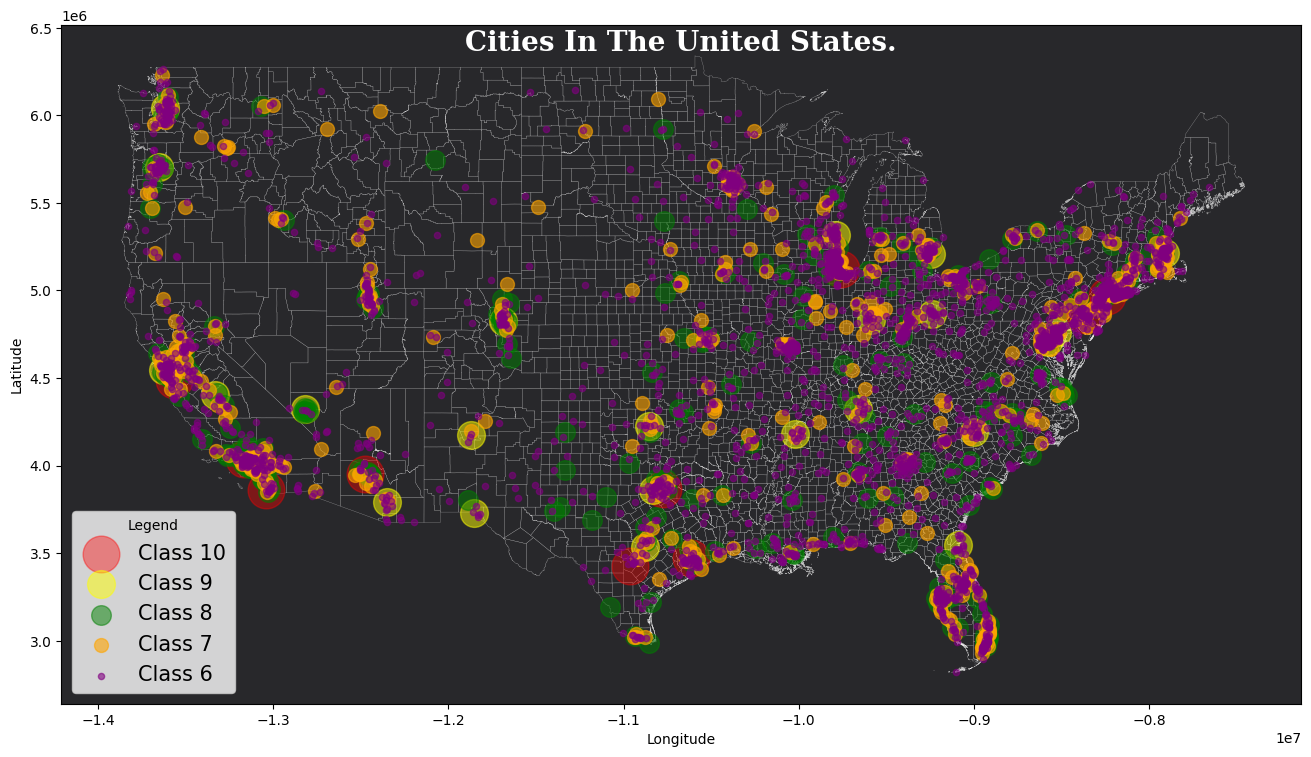

In [9]:
# Read cities data 

cities_10 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_10.shp")
cities_9 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_9.shp")
cities_8 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_8.shp")
cities_7 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_7.shp")
cities_6 = gpd.read_file("F:/MOOC's/ESRI MOOC/ESRI  MOOC Training 1/Wk 1 Task 2 Data Visualization/Data Export/Cities/Exportdata/city_pop_cls_6.shp")

# Reproject to projected crs(metric), uses meters 
data3 = data3.to_crs(epsg=3857)
cities_10 = cities_10.to_crs(epsg=3857)
cities_9 = cities_9.to_crs(epsg=3857)
cities_8 = cities_8.to_crs(epsg=3857)
cities_7 = cities_7.to_crs(epsg=3857)
cities_6 = cities_6.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(16, 12))
data3.plot(ax=ax, color='#28282B', edgecolor='white', linewidth=0.2, alpha=0.6, label='County')
cities_10.plot(ax=ax, marker='o', color='red', markersize = 700, alpha=0.4, label='Class 10')
cities_9.plot(ax=ax, marker='o', color='yellow', markersize=400, alpha=0.5, label='Class 9')
cities_8.plot(ax=ax, marker='o', color='green', markersize=200, alpha=0.5, label='Class 8')
cities_7.plot(ax=ax, marker='o', color='orange', markersize=100, alpha=0.6, label='Class 7')
cities_6.plot(ax=ax, marker='o', color='purple', markersize=20, alpha=0.6, label='Class 6')

plt.legend(title = "Legend", fontsize="15") # Legend
plt.title("Cities In The United States.", fontsize=20, fontweight='bold', fontfamily='serif', y=0.95, color='white')  # Title 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().set_facecolor('#28282B')  # Background colour of plot area
plt.show()

### Neighborhood Analysis. 
Find the closest city to each polygon in all the classes then find the distance. All geopandas operaiona are planar, meaning the do not have a third dimension and use projected coordinate system that uses meters as units. Geographic system results in errors since it uses a cartesian coordinate that is suited for angular distances. 


In [1]:
# Lets design a function that takes in a city layer, polygon and class then generates the distance between them.

def closest_city(counties, cities, size):

    # ------- Centroid -----------
    # Find the centroid of each polygon, we will find the closest city to the center of polygon  
    counties['centroid_geom'] = counties.centroid
    # Set center as link, join will use this column (instead of polygon) to find the closest city  
    counties = counties.set_geometry('centroid_geom')
    
    # Perform a nearest join , find the closest city to each polygon, include distance column 
    # Output is an union of both layers with and added distance column.
    # N\B - the geometry of the second layer, in this case points, is not included
    # When a layer intersects with a point distance will be 0
    cities_w_counties = gpd.sjoin_nearest(counties, cities, distance_col="distances")

    # Divide distances by 1000 to get km units
    cities_w_counties.distances = cities_w_counties.distances / 1000

    # Filter columns , get geometry column of counties and the distance to nearest city
    # Also unique columns to identify both county(fips) and city(placefips) 
    cities_w_counties = cities_w_counties[['fips', 'geometry', 'PLACEFIPS', 'distances']]


    #------------------------------------------------------------------------
    # --------------      Merge operation     -------------------------------
    #------------------------------------------------------------------------
   
    # Get the geometry of the second layer with an left join with points layer
    merged = pd.merge(cities_w_counties, cities, how="left", on=["PLACEFIPS", "PLACEFIPS"])

    # Filter columns, remove all columns from point layer except geometry and distance of point
    # Geometry of polygon layer is removed to prevent complications during merging later 
    merged = merged[['fips', 'PLACEFIPS', 'geometry_y', 'distances']] 

    # Rename columns 
    merged.rename(columns={'geometry_x':'geometry_polygon'}, inplace=True)

    # Rename distance column
    if size == 10 :
        merged.rename(columns={'distances':'distances_10', 
                               'geometry_y':'geometry_point_10',
                               'PLACEFIPS':'PLACEFIPS_10'}, inplace=True)
    elif size == 9:
        merged.rename(columns={'distances':'distances_9', 
                               'geometry_y':'geometry_point_9',
                               'PLACEFIPS':'PLACEFIPS_9'}, inplace=True)
    elif size == 8:
        merged.rename(columns={'distances':'distances_8', 
                               'geometry_y':'geometry_point_8',
                               'PLACEFIPS':'PLACEFIPS_8'}, inplace=True)
    elif size == 7:
        merged.rename(columns={'distances':'distances_7', 
                               'geometry_y':'geometry_point_7',
                               'PLACEFIPS':'PLACEFIPS_7'}, inplace=True)
    else :
        merged.rename(columns={'distances':'distances_6', 
                               'geometry_y':'geometry_point_6',
                               'PLACEFIPS':'PLACEFIPS_6'}, inplace=True)


    # Return two tables, one with distance only and another with both geoms and distance 
    return cities_w_counties, merged


# Call function passing county layer, city points, and city class, then assign values to variables 
county_dist_10, merged_geom_10 = closest_city(data3, cities_10, 10)
county_dist_9, merged_geom_9 = closest_city(data3, cities_9, 9)
county_dist_8, merged_geom_8 = closest_city(data3, cities_8, 8)
county_dist_7, merged_geom_7 = closest_city(data3, cities_7, 7)
county_dist_6, merged_geom_6 = closest_city(data3, cities_6, 6)

NameError: name 'data3' is not defined

In [11]:
# Table with distance and polygon geom 

print(f'Table of polygon with distances : \n {county_dist_10.head(2)} \n\n')
print(f'colums : {county_dist_10.columns}')

Table of polygon with distances : 
     fips                                           geometry PLACEFIPS  \
0  01001  MULTIPOLYGON (((-9619464.071 3856528.446, -961...   4835000   
1  01003  MULTIPOLYGON (((-9742872.755 3543445.886, -974...   4835000   

     distances  
0  1036.217737  
1   860.127903   


colums : Index(['fips', 'geometry', 'PLACEFIPS', 'distances'], dtype='object')


In [12]:
# Table with point geom and distance 

print(f'Table of Polygon with point geom : \n {merged_geom_10.head(2)}')
print(f'\n\n colums : {merged_geom_10.columns}')
print(f'\n\n shape : {merged_geom_6.shape}')

Table of Polygon with point geom : 
     fips PLACEFIPS_10                  geometry_point_10  distances_10
0  01001      4835000  POINT (-10616262.316 3472578.411)   1036.217737
1  01003      4835000  POINT (-10616262.316 3472578.411)    860.127903


 colums : Index(['fips', 'PLACEFIPS_10', 'geometry_point_10', 'distances_10'], dtype='object')


 shape : (3108, 4)


In [13]:
# Calculate centroid of original polygons that will be used to plot a line to closest city 

data3['poly_centroid'] = data3.centroid
data3.columns

Index(['fips', 'state_abbr', '2022_median_age', '2022_per_capitalincome',
       'voter_turnout_2008', 'voter_turnout_2012', 'voter_turnout_2016',
       'voter_turnout_2020', 'perc_2022_age_25+_with_bachelors_degree',
       '2022_avg_disposable_income', 'geometry', 'centroid_geom',
       'poly_centroid'],
      dtype='object')

In [14]:
# Merge data from all classes of cities to polygon to form a single table using chain operation 
# Through this we will access distance from each polygon to closest city from one table 

data3_merged = data3.merge(merged_geom_10, on='fips', how='inner')\
                .merge(merged_geom_9, on='fips', how='inner')\
                .merge(merged_geom_8, on='fips', how='inner')\
                .merge(merged_geom_7, on='fips', how='inner')\
                .merge(merged_geom_6, on='fips', how='inner')
print(data3_merged.head(2))

print(f'\n------------------------------\n columns {data3_merged.columns}')
print(f'\n------------------------------\n shape {data3_merged.shape}')



    fips state_abbr  2022_median_age  2022_per_capitalincome  \
0  01001         AL             39.1                 32233.0   
1  01003         AL             43.3                 37891.0   

   voter_turnout_2008  voter_turnout_2012  voter_turnout_2016  \
0            0.621968            0.590258            0.604600   
1            0.622114            0.592132            0.598103   

   voter_turnout_2020  perc_2022_age_25+_with_bachelors_degree  \
0            0.632502                                    17.39   
1            0.627867                                    22.58   

   2022_avg_disposable_income  ... distances_9 PLACEFIPS_8  \
0                     66149.0  ...  490.027387     0151000   
1                     70900.0  ...  638.719435     0150000   

                   geometry_point_8 distances_8 PLACEFIPS_7  \
0  POINT (-9607246.447 3813018.404)   43.095720     0135896   
1  POINT (-9801840.833 3591942.584)   37.034104     1255925   

                   geometry_point_7

In [ ]:
# Ex

### Visualise distances between polygons and cities.

Create line string between centroid of polygon to the closest class 10 city.

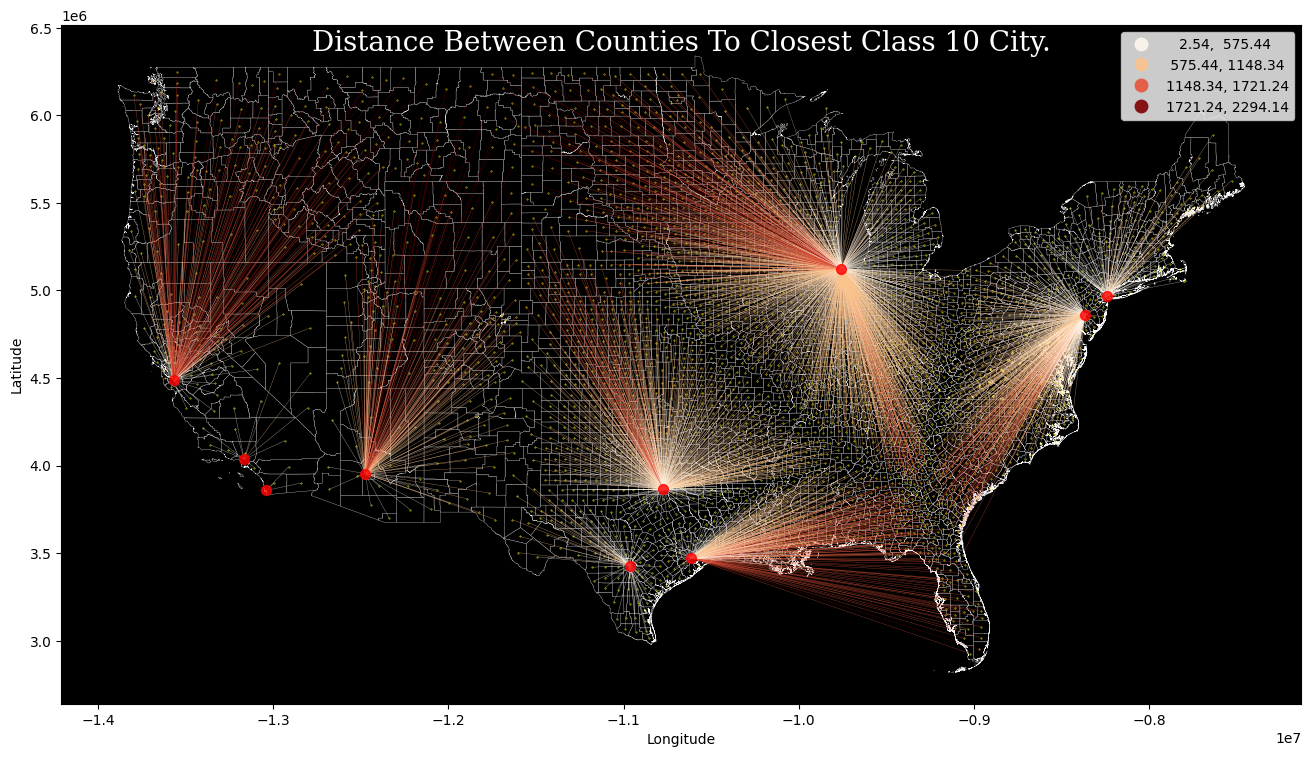

In [24]:
# Create a link (LineString) between centroid of and closest class 10 city
# Loop(apply function) through point geometries and create a line string , using lambda pass then to Linestring function
data3_merged['link'] = data3_merged.apply(lambda row: LineString([row['poly_centroid'], row['geometry_point_10']]), axis=1)

# Set distance geometry as the active geom
merged_links = data3_merged.copy()
merged_links = merged_links.set_geometry('link')

# Set centroid as active geometry in centroid data
merged_centroid = data3_merged.copy()
merged_centroid = merged_centroid.set_geometry('poly_centroid')


# Initaiate Plot 
fig, ax = plt.subplots(figsize=(16, 16))
# Add county polygon 
data3.plot(ax=ax, 
             color='black',           # Background colour of plot area
             alpha=1,                 # transparency for background colour of plot area (1 is highest)
             edgecolor='white',       # Boundary colour
             linewidth=0.2,       # Line width, 
             label='County')

# Add centroid of poligon as yellow point features 
merged_centroid.plot(ax=ax, marker='o', color='yellow', markersize = 0.1, alpha=1, label='Centroid')

# Add class 10 cities as red point features , overlay above links(has higher z order)
cities_10.plot(ax=ax, marker='o', color='red', markersize = 50, alpha=0.8, label='Class 10', zorder=2)

# Add distance line 
merged_links.plot(ax=ax, 
                  column='distances_10', cmap = 'OrRd', scheme= "equalinterval", # Colour based on distance variable 
                  k=4,          # Number of bins in split 
                  linewidth=0.2, alpha=0.9, label='Distance', 
                  zorder=1,                  # Add below other features 
                  legend=True
                 )


#plt.legend(title = "Legend", fontsize="15") # Add Legend
plt.title("Distance Between Counties To Closest Class 10 City.", fontfamily='serif',
          fontsize=20, fontweight='medium', color='white', y=0.95)  # Add Title 
   # Label axis 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
   # Background colour of plot area
plt.gca().set_facecolor('black')  
plt.show()

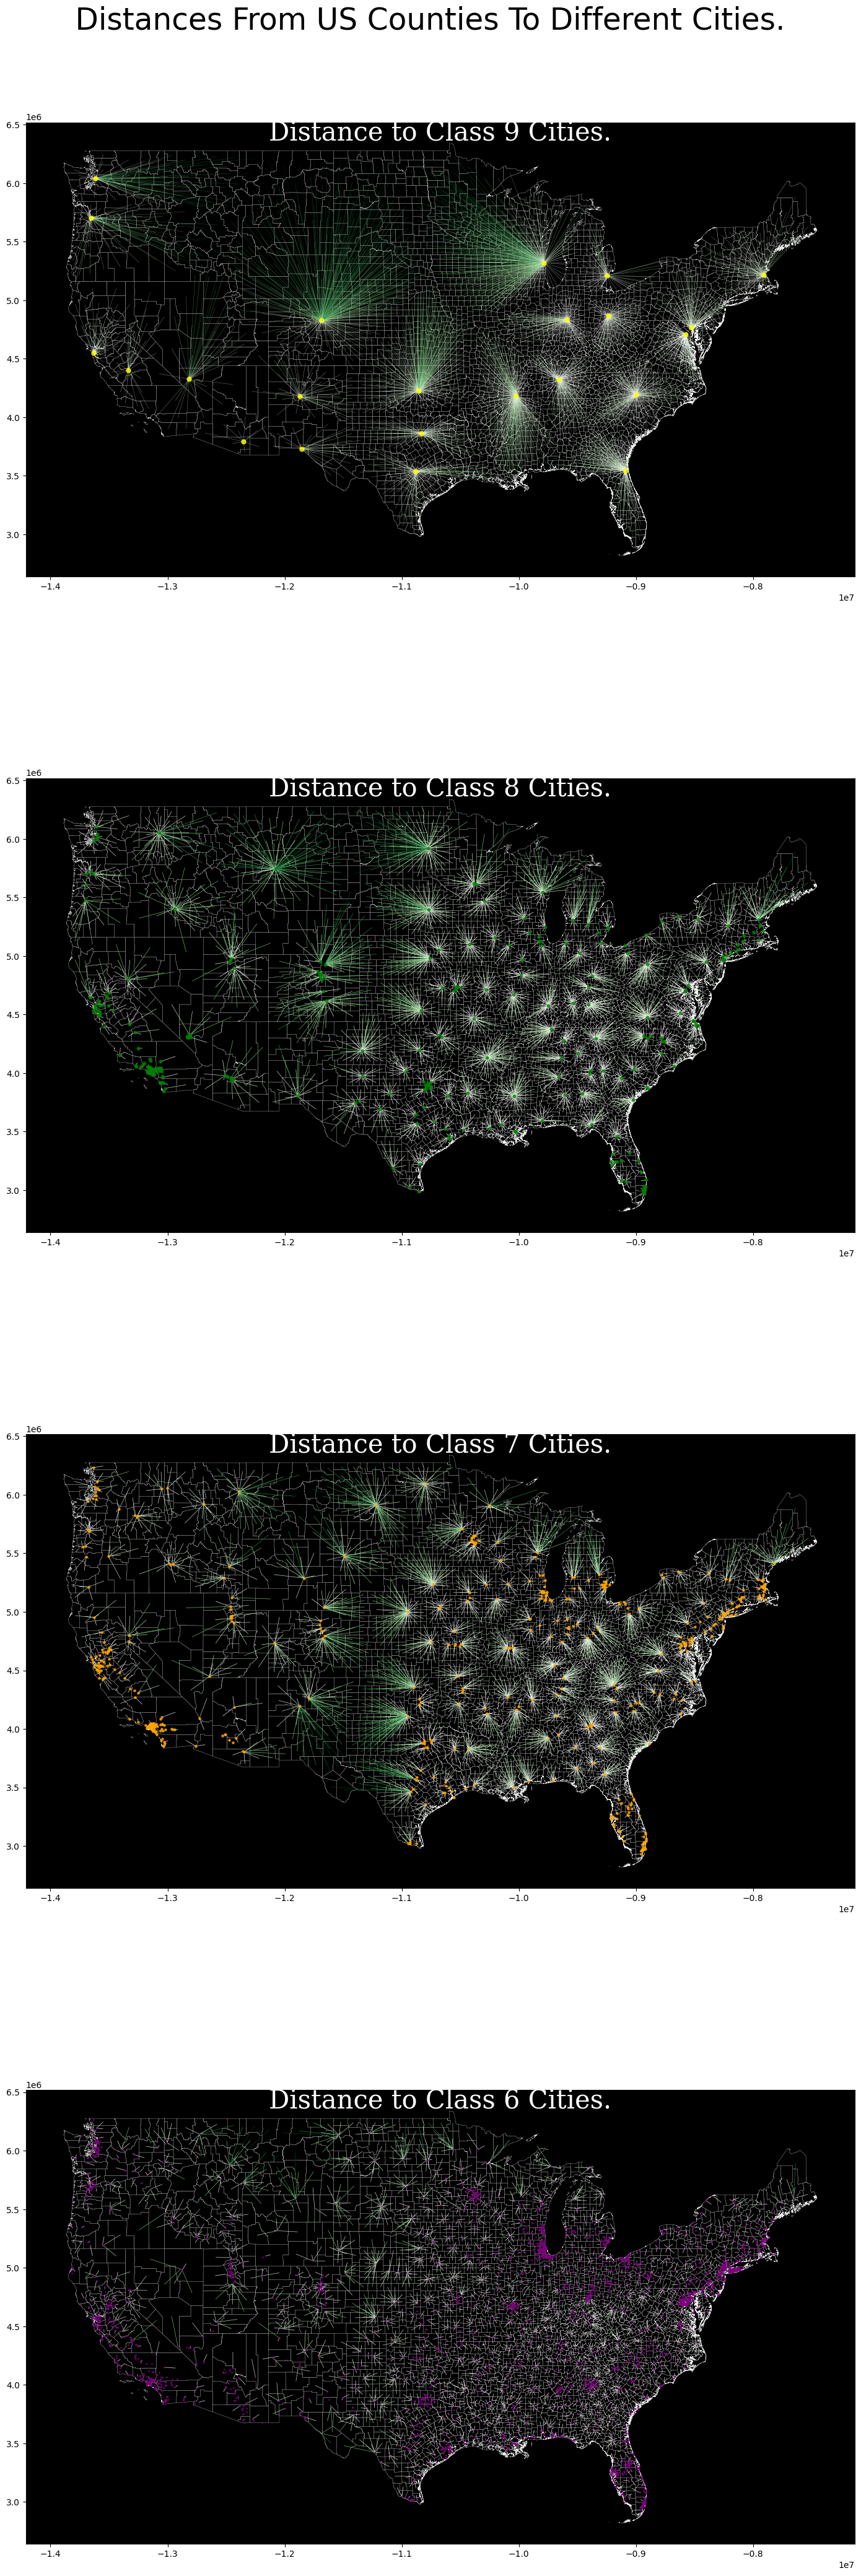

In [25]:
# Visualise all city classes 

# Create line strings between center of polygons to all city classes
data3_merged['link_9'] = data3_merged.apply(lambda row: LineString([row['poly_centroid'], row['geometry_point_9']]), axis=1)
data3_merged['link_8'] = data3_merged.apply(lambda row: LineString([row['poly_centroid'], row['geometry_point_8']]), axis=1)
data3_merged['link_7'] = data3_merged.apply(lambda row: LineString([row['poly_centroid'], row['geometry_point_7']]), axis=1)
data3_merged['link_6'] = data3_merged.apply(lambda row: LineString([row['poly_centroid'], row['geometry_point_6']]), axis=1)


# Set distance geometry as the active geometry will be overlayed in final map  
merged_links = data3_merged.copy()
merged_links9 = merged_links.set_geometry('link_9')
merged_links8 = merged_links.set_geometry('link_8')
merged_links7 = merged_links.set_geometry('link_7')
merged_links6 = merged_links.set_geometry('link_6')


# initiate plot 
fig, axes = plt.subplots(nrows=4, ncols=1, sharey=True, figsize=(14, 44))
# Add title to major plot 
fig.suptitle(' Distances From US Counties To Different Cities. ', fontsize=35)


# Class 9 cities 
data3.plot(ax=axes[0], color='black', edgecolor='white', linewidth=0.2, alpha=1, label='County')
merged_links9.plot(ax=axes[0], column='distances_9', cmap = 'Greens', scheme= "equalinterval", # Colour based on distance 
                 linewidth=0.2, alpha=0.9, label='Distance', zorder=1)
cities_9.plot(ax=axes[0], marker='o', color='yellow', markersize = 25, alpha=0.8, label='Class 9', zorder=2)
axes[0].set_title("Distance to Class 9 Cities.", fontweight="medium", size=30, y=0.95, color='white'
                  , fontfamily='serif')
axes[0].set_facecolor('black')


# Class 8 cities 
data3.plot(ax=axes[1], color='black', edgecolor='white', linewidth=0.2, alpha=1, label='County')
merged_links8.plot(ax=axes[1], column='distances_8', cmap = 'Greens', scheme= "equalinterval", 
                linewidth=0.5, alpha=0.9, label='Distance', zorder=1)
cities_8.plot(ax=axes[1], marker='o', color='green', markersize = 10, alpha=0.8, label='Class 8', zorder=2)
axes[1].set_title("Distance to Class 8 Cities.", fontweight="medium", size=30, y=0.95, color='white'
                  , fontfamily='serif')
axes[1].set_facecolor('black')


# Class 7 cities 
data3.plot(ax=axes[2], color='black', edgecolor='white', linewidth=0.2, alpha=1, label='County')
merged_links7.plot(ax=axes[2], column='distances_7', cmap = 'Greens', scheme= "equalinterval", 
                 linewidth=0.5, alpha=0.9, label='Distance', zorder=1)
cities_7.plot(ax=axes[2], marker='o', color='orange', markersize = 5, alpha=0.8, label='Class 7', zorder=2)
axes[2].set_title("Distance to Class 7 Cities.", fontweight="medium", size=30, y=0.95, color='white'
                  , fontfamily='serif')
axes[2].set_facecolor('black')


# Class 6 cities 
data3.plot(ax=axes[3], color='black', edgecolor='white', linewidth=0.2, alpha=1, label='County')
merged_links6.plot(ax=axes[3], column='distances_6', cmap = 'Greens', scheme= "equalinterval", 
                 linewidth=0.5, alpha=0.9, label='Distance', zorder=1)
cities_6.plot(ax=axes[3], marker='o', color='purple', markersize = 1, alpha=0.8, label='Class 6', zorder=2)
axes[3].set_title("Distance to Class 6 Cities.", fontweight="medium", size=30, y=0.95, color='white'
                  , fontfamily='serif')
axes[3].set_facecolor('black')


# set spacing
fig.tight_layout()
plt.show()


## Design model 3.

After visualising the distance from each county to all classes of cities, we will add this feature into our decision tree model to determine whether it improves voter turn out. A geograhic feature will also be incooperated to study their effects.   

### Feature Selection. 
From previous models, there are features that are redundant to our model design. They include : percentage of poeple with an income below poverty line, median age, percebtage of people with more than 25 years with no diploma, and the average credit card debt. These variables had the lowest score when assessing the influence of previous regression models as observed in model 2 and model 3. Ommiting them from our model will redice computation time and as well as improving on our model predictive performance. Understanding the this process is crucial to the efficacy of our model considering that we will be adding new features such as distance and location. 

### Encoding Geographical Data.
Another key feature that should be analysed on the model is the geographical(state) designation of a county. We must figure a way to include this categorical data into the algorithm so as to view the potential impact. The biggest challenge is turning textual information i.e AZ, CL to a more meaningfull numeriacl data that is understood by the model. There are multiple methods used to encode data, a simple one is label encoding that simply converts a variable into a number. From our data, there are 49 states meaning each will be assigned a different values all in a single column. This technique provides a more compacted data but runs the risk if 'misinterpretation' by the model, i.e if a state is assigned a value 0 and another given 49, the algorithm will easily assign more weight 49X to the later causing huge misrepresentation of real life data. 

To solve this problem, we will take a commonly used design method, One Hot Encoding. It simply comverts a value to binary values either 1(true) or 0(false). The upside to this algorithm, it does not inapproprietly weigh a value but it results to more variables in the dataset increasing complexity. For our data 49 more variable will be added because there are such unique number of values.    

### Feature Scalling.
Pre-processing operation prior to modelling can be a tedious task. A machine learning engineer needs to transfrom data to a format and structure that provides a predictive model condusive enviroment free of errors. Remember these models have different assumptions about the data that and may greatly impact outputs of non-consistent or incompatible data. Feature scalling transforms a numerical features into a common scale by normalising a distribution thus reducing potential biases arising from variations. It also improve the predictive ability of a model by ensuring no single variable has an unwarranted domination in the learning algorithm's output. By scaling the features, we can ensure that they contribute equally to the model’s performance. In some cases, this steps ensures there is a higher levels of convergence speed and performance during modelling. For this study, we will use normalisation technique which transforms feature to values between 1 and 0. 


### Prediction.


In [26]:
# Feature Selection.  

# View data 
print(f'sample data : \n {data3_merged.head(2)} \n\n --------------------------------------')

# Filter needed columns that will be fed into our model, drop link path geometries and retain distances   
model3_df = data3_merged[['2022_median_age', '2022_per_capitalincome', 'state_abbr', 'voter_turnout_2008', 'voter_turnout_2012',
                    'voter_turnout_2016', 'perc_2022_age_25+_with_bachelors_degree',  '2022_avg_disposable_income',
                   'distances_10','distances_9','distances_8','distances_7','distances_6', 'voter_turnout_2020']]

print(f'sample model data : \n : {model3_df.head(2)} \n\n {model3_df.columns}')


sample data : 
     fips state_abbr  2022_median_age  2022_per_capitalincome  \
0  01001         AL             39.1                 32233.0   
1  01003         AL             43.3                 37891.0   

   voter_turnout_2008  voter_turnout_2012  voter_turnout_2016  \
0            0.621968            0.590258            0.604600   
1            0.622114            0.592132            0.598103   

   voter_turnout_2020  perc_2022_age_25+_with_bachelors_degree  \
0            0.632502                                    17.39   
1            0.627867                                    22.58   

   2022_avg_disposable_income  ...                  geometry_point_7  \
0                     66149.0  ...  POINT (-9663004.907 3946852.946)   
1                     70900.0  ...  POINT (-9707510.441 3559321.862)   

  distances_7 PLACEFIPS_6                  geometry_point_6 distances_6  \
0  114.519624     0162328  POINT (-9624686.599 3823859.948)   22.618025   
1   70.090742     0119648  PO

In [27]:
# Model features information 

model3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   2022_median_age                          3108 non-null   float64
 1   2022_per_capitalincome                   3108 non-null   float64
 2   state_abbr                               3108 non-null   object 
 3   voter_turnout_2008                       3108 non-null   float64
 4   voter_turnout_2012                       3108 non-null   float64
 5   voter_turnout_2016                       3108 non-null   float64
 6   perc_2022_age_25+_with_bachelors_degree  3108 non-null   float64
 7   2022_avg_disposable_income               3108 non-null   float64
 8   distances_10                             3108 non-null   float64
 9   distances_9                              3108 non-null   float64
 10  distances_8                              3108 no

In [28]:
# View basic statistics for numeric values .

model3_df.describe().round(2)

2022_median_age  2022_per_capitalincome  voter_turnout_2008  \
count          3108.00                 3108.00             3108.00   
mean             42.60                32696.16                0.61   
std               5.36                 7995.41                0.09   
min              22.30                12514.00                0.20   
25%              39.30                27503.75                0.55   
50%              42.40                31744.00                0.61   
75%              45.70                36209.25                0.67   
max              64.60                85462.00                1.00   

       voter_turnout_2012  voter_turnout_2016  \
count             3108.00             3108.00   
mean                 0.58                0.59   
std                  0.10                0.09   
min                  0.18                0.17   
25%                  0.52                0.53   
50%                  0.58                0.59   
75%                  0.65                0.65   
max                  1.00                1.00   

       perc_2022_age_25+_with_bachelors_degree  2022_avg_disposable_income  \
count                                  3108.00                     3108.00   
mean                                     15.55                    63499.14   
std                                       6.01                    13709.26   
min                                       0.00                    32901.00   
25%                                      11.21                    54604.75   
50%                                      14.52                    61532.00   
75%                                      18.77                    69431.75   
max                                      47.68                   140490.00   

       distances_10  distances_9  distances_8  distances_7  distances_6  \
count       3108.00      3108.00      3108.00      3108.00      3108.00   
mean         749.88       391.91       146.83       134.06        52.44   
std          426.92       272.21       110.77        99.92        49.87   
min            2.54         0.94         0.01         0.00         0.01   
25%          434.92       204.89        71.04        63.00        17.59   
50%          688.14       323.27       119.67       112.16        42.52   
75%         1010.29       497.32       186.88       178.23        66.19   
max         2294.14      1534.36       748.86       683.14       477.25   

       voter_turnout_2020  
count             3108.00  
mean                 0.66  
std                  0.10  
min                  0.21  
25%                  0.59  
50%                  0.66  
75%                  0.72  
max                  1.00

In [29]:
# Get featres from normalized data.
data5 = model3_df[['voter_turnout_2008', 'voter_turnout_2012', 'voter_turnout_2016', 'voter_turnout_2020', 
                     '2022_median_age', 'perc_2022_age_25+_with_bachelors_degree', '2022_per_capitalincome', 
                     '2022_avg_disposable_income', '2022_median_age', 'distances_10', 'distances_9']]

# Define training features
X = data5.drop(columns='voter_turnout_2020')

# Define labels 
y = data5[['voter_turnout_2020']]


# Fit a decision tree regressor to the dataset 
parameters = {'max_depth':[7, 8, 10, 11, 12],
              'max_leaf_nodes': [60, 70, 80, 90, 100],
              'max_features':[26, 34, 44, 52, 60]}

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)

rg6 = DecisionTreeRegressor()
rg6 = GridSearchCV(rg6, parameters)

# Train the model, fit the model ,gain knowledge of the data 
rg6.fit(X_train, y_train)

# Get the best parameters 
print(f'Best parameters : {rg6.best_params_} \n')

# Predict values using test and train data 
y_pred1 = rg6.predict(X_train)
y_pred = rg6.predict(X_test)


# Evaluation of model using MAE and R2 score 
t11 = mean_absolute_error(y_test, y_pred)
t12 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t11}')
print(f'MAE of Decision Tree Regressor on train data : {t12} \n')

print(f'R2 Score on train data : {rg6.score(X_train,y_train)}')
print(f'R2 Score on test data : {rg6.score(X_test,y_test)}')

Best parameters : {'max_depth': 8, 'max_features': 60, 'max_leaf_nodes': 60} 

MAE of Decision Tree Regressor on test set : 0.030146803169298717
MAE of Decision Tree Regressor on train data : 0.024856414949035847 

R2 Score on train data : 0.8906206148379889
R2 Score on test data : 0.804951050941015


### Standardize and encode data. 

Cartegorical data containing state name needs to be encoded into a format that is understood by machine lerning models. This variable is nominal as it has no hierarchy associated with it. This process results to more information for the model thus can improve its quality but it also brings in more variables into the model increasing complexity, dimensionality, and slowing down training. Like in our case there will be new 49 feature correponding to the number of states.  

#### Split data 

In [30]:
# Split data 

# Fetch data that needs to be standardised by droping unwanted columns 
X1 = model3_df.drop(columns=['state_abbr', 'voter_turnout_2008', 'voter_turnout_2012', 
                             'voter_turnout_2016', 'voter_turnout_2020'], axis=1)

# Already standardised columns , will be used to merge vertically to form predictor variables 
X2 = model3_df[['voter_turnout_2008', 'voter_turnout_2012', 'voter_turnout_2016']]

# Variable to be predicted 
y = model3_df[['voter_turnout_2020']]

X1

2022_median_age  2022_per_capitalincome  \
0                39.1                 32233.0   
1                43.3                 37891.0   
2                40.4                 22826.0   
3                39.8                 25152.0   
4                41.3                 28176.0   
...               ...                     ...   
3103             35.5                 37688.0   
3104             39.1                 58009.0   
3105             35.9                 32885.0   
3106             43.2                 30448.0   
3107             43.7                 33282.0   

      perc_2022_age_25+_with_bachelors_degree  2022_avg_disposable_income  \
0                                       17.39                     66149.0   
1                                       22.58                     70900.0   
2                                        8.60                     46539.0   
3                                        7.17                     54495.0   
4                                        9.56                     58344.0   
...                                       ...                         ...   
3103                                    17.51                     77322.0   
3104                                    42.90                    104190.0   
3105                                    13.19                     70602.0   
3106                                    18.50                     58243.0   
3107                                    15.92                     67100.0   

      distances_10  distances_9  distances_8  distances_7  distances_6  
0      1036.217737   490.027387    43.095720   114.519624    22.618025  
1       860.127903   638.719435    37.034104    70.090742    24.835940  
2      1143.574988   461.591157    90.994509    83.147599    27.518372  
3      1010.036492   430.163712    79.546213    55.934168    45.568575  
4      1104.867059   298.205833    65.713098    83.677487    39.083184  
...            ...          ...          ...          ...          ...  
3103   1209.379801   518.385351   360.832405   330.038534    41.245333  
3104   1510.266300   886.300069   370.749331   175.292230   135.069527  
3105   1113.308554   660.206343   168.530726   158.353242    46.609572  
3106   1574.008504   692.815721   308.682369   222.418007   155.122675  
3107   1705.043543   615.978219   494.050118   153.573312   125.228466  

[3108 rows x 9 columns]

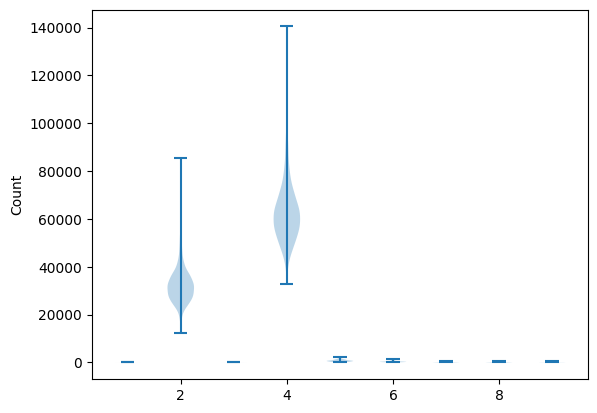

In [31]:
# Data distribution before scalling 

plt.violinplot(X1)
plt.ylabel('Values')
plt.show()

#### Normalize data.

Normalisation scales data using minimum and maximum values. 


In [32]:
# Scaler 
scaleMinMax = MinMaxScaler(feature_range=(0, 1))  # Scaler ensures values should range between 0 and 1 

X1 = scaleMinMax.fit_transform(X1)

# Create a dataframe of scaled data 
X1 = pd.DataFrame(X1, columns=['2022_median_age', '2022_per_capitalincome', 'perc_2022_age_25+_with_bachelors_degree',
                               '2022_avg_disposable_income', 'distances_10', 'distances_9', 'distances_8', 
                                'distances_7', 'distances_6' ])

# View Scaled data 
print(f'Scaled data features  : \n {X1.describe().round(4)}')

Scaled data features  : 
        2022_median_age  2022_per_capitalincome  \
count        3108.0000               3108.0000   
mean            0.4800                  0.2767   
std             0.1267                  0.1096   
min             0.0000                  0.0000   
25%             0.4019                  0.2055   
50%             0.4752                  0.2636   
75%             0.5532                  0.3248   
max             1.0000                  1.0000   

       perc_2022_age_25+_with_bachelors_degree  2022_avg_disposable_income  \
count                                3108.0000                   3108.0000   
mean                                    0.3261                      0.2844   
std                                     0.1260                      0.1274   
min                                     0.0000                      0.0000   
25%                                     0.2351                      0.2017   
50%                                     0.3044         

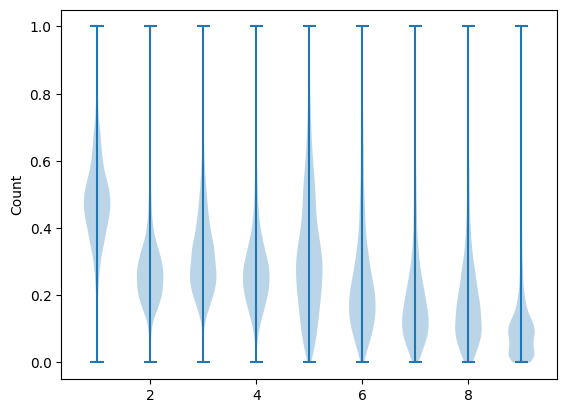

In [33]:
# Distribution after scalling 

plt.violinplot(X1)
plt.ylabel('Values')
plt.show()

# Encoding. 

State name column needs to be encoded. 

In [34]:
# All states   
print(f'States : {model3_df['state_abbr'].unique()} \n\n ----------------------------\n\n')

# Call the function that encodes data to binary column.
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform='pandas')

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(model3_df[['state_abbr']])

print(one_hot_encoded)

States : ['AL' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'ID' 'IL' 'IN' 'IA'
 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV' 'NH'
 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX'
 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY'] 

 ----------------------------


      state_abbr_AL  state_abbr_AR  state_abbr_AZ  state_abbr_CA  \
0               1.0            0.0            0.0            0.0   
1               1.0            0.0            0.0            0.0   
2               1.0            0.0            0.0            0.0   
3               1.0            0.0            0.0            0.0   
4               1.0            0.0            0.0            0.0   
...             ...            ...            ...            ...   
3103            0.0            0.0            0.0            0.0   
3104            0.0            0.0            0.0            0.0   
3105            0.0            0.0            0.0            0.0   
3106            0.0        

#### Merge data.

We need to merge standardised and encoded data to original dataframe. 

In [35]:
# Concatenate standardised, already statndardised, encoded, and target data together
model3_data = pd.concat([X1, X2, one_hot_encoded, y], axis=1)

# View data 
model3_data

2022_median_age  2022_per_capitalincome  \
0            0.397163                0.270316   
1            0.496454                0.347878   
2            0.427896                0.141361   
3            0.413712                0.173247   
4            0.449173                0.214701   
...               ...                     ...   
3103         0.312057                0.345095   
3104         0.397163                0.623663   
3105         0.321513                0.279254   
3106         0.494090                0.245846   
3107         0.505910                0.284696   

      perc_2022_age_25+_with_bachelors_degree  2022_avg_disposable_income  \
0                                    0.364723                    0.309028   
1                                    0.473574                    0.353187   
2                                    0.180369                    0.126760   
3                                    0.150378                    0.200708   
4                                    0.200503                    0.236483   
...                                       ...                         ...   
3103                                 0.367240                    0.412877   
3104                                 0.899748                    0.662605   
3105                                 0.276636                    0.350417   
3106                                 0.388003                    0.235545   
3107                                 0.333893                    0.317867   

      distances_10  distances_9  distances_8  distances_7  distances_6  \
0         0.451073     0.318952     0.057533     0.167636     0.047377   
1         0.374232     0.415919     0.049438     0.102599     0.052024   
2         0.497921     0.300407     0.121496     0.121712     0.057645   
3         0.439648     0.279912     0.106208     0.081876     0.095467   
4         0.481030     0.193858     0.087736     0.122488     0.081877   
...            ...          ...          ...          ...          ...   
3103      0.526637     0.337445     0.481836     0.483121     0.086408   
3104      0.657937     0.577375     0.495079     0.256597     0.283005   
3105      0.484714     0.429931     0.225038     0.231801     0.097648   
3106      0.685752     0.451197     0.412195     0.325582     0.325024   
3107      0.742933     0.401088     0.659734     0.224804     0.262384   

      voter_turnout_2008  ...  state_abbr_TN  state_abbr_TX  state_abbr_UT  \
0               0.621968  ...            0.0            0.0            0.0   
1               0.622114  ...            0.0            0.0            0.0   
2               0.556459  ...            0.0            0.0            0.0   
3               0.500521  ...            0.0            0.0            0.0   
4               0.597636  ...            0.0            0.0            0.0   
...                  ...  ...            ...            ...            ...   
3103            0.570610  ...            0.0            0.0            0.0   
3104            0.818477  ...            0.0            0.0            0.0   
3105            0.598294  ...            0.0            0.0            0.0   
3106            0.679934  ...            0.0            0.0            0.0   
3107            0.611280  ...            0.0            0.0            0.0   

      state_abbr_VA  state_abbr_VT  state_abbr_WA  state_abbr_WI  \
0               0.0            0.0            0.0            0.0   
1               0.0            0.0            0.0            0.0   
2               0.0            0.0            0.0            0.0   
3               0.0            0.0            0.0            0.0   
4               0.0            0.0            0.0            0.0   
...             ...            ...            ...            ...   
3103            0.0            0.0            0.0            0.0   
3104            0.0            0.0            0.0            0.0   
3105            0.0            0.0            0.0     

### Predict model using new features created previously. 

In [36]:
# Define training features
X = model3_data.drop(columns='voter_turnout_2020')
print(f'Training features : \n {X.head()} \n --------------------------------------------\n ')

# Define labels 
y = model3_data[['voter_turnout_2020']]
print(f'\n Labels : \n {y.head()}')

Training features : 
    2022_median_age  2022_per_capitalincome  \
0         0.397163                0.270316   
1         0.496454                0.347878   
2         0.427896                0.141361   
3         0.413712                0.173247   
4         0.449173                0.214701   

   perc_2022_age_25+_with_bachelors_degree  2022_avg_disposable_income  \
0                                 0.364723                    0.309028   
1                                 0.473574                    0.353187   
2                                 0.180369                    0.126760   
3                                 0.150378                    0.200708   
4                                 0.200503                    0.236483   

   distances_10  distances_9  distances_8  distances_7  distances_6  \
0      0.451073     0.318952     0.057533     0.167636     0.047377   
1      0.374232     0.415919     0.049438     0.102599     0.052024   
2      0.497921     0.300407     0.121496  

In [37]:
# Fit a decision tree regressor to the dataset 

parameters = {'max_depth':[7, 8, 10, 11, 12],
              'max_leaf_nodes': [60, 70, 80, 90, 100],
              'max_features':[26, 34, 44, 52, 60]}

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)

rg5 = DecisionTreeRegressor()
rg5 = GridSearchCV(rg5, parameters)

# Train the model, fit the model ,gain knowledge of the data 
rg5.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 8, 10, 11, 12],
                         'max_features': [26, 34, 44, 52, 60],
                         'max_leaf_nodes': [60, 70, 80, 90, 100]})

In [38]:
# Get the best parameters 
rg5.best_params_

{'max_depth': 10, 'max_features': 52, 'max_leaf_nodes': 60}

#### Evaluate Metrics for Decison Tree Regression Task.



In [39]:
# Predict values using test and train data 
y_pred1 = rg5.predict(X_train)
y_pred = rg5.predict(X_test)

# Evaluation of model using MAE 
# Mean Absolute Error provides the average magnitude of errors between the predicted and actual values. Ideally 
# it measures the closeness by finding the average absolute difference, a lower value indicates a better fit. 
# This metric is easily understood and less sensitive to outliers as compared to MSE which squares the error term.
# 
t9 = mean_absolute_error(y_test, y_pred)
t10 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t9}')
print(f'MAE of Decision Tree Regressor on train data : {t10}')

MAE of Decision Tree Regressor on test set : 0.02963544923280153
MAE of Decision Tree Regressor on train data : 0.024761384212859724


In [40]:
# evaluate the model metrics 

# Remember this is NOT a classification model rather its a regressor. For this reason measure of performance 
# is based on how close the predicted value is to expected values. Thats why accuracy isn't used but level of 
# erros is prefered because it provides an average of closeness between the two values. 
# Among the multiple error metriocs are provided in the scikit-learn library : r2 score, Mean Absolute Error(MAE), 
# Mean Squared Error(MSE) and Root Mean Square Error(RMSE).
# R2 score is the default choice for regression, its a statistical measure that explains the proportion of
# variance in the target variable that is predictable from the from independent features. 
# Values closer to 1 indicate a better performance(good fit) since most variation can be explained, 0 means 
# no variance can be explained while negative values are indicative of poorly performing model(worse than the 
# horizontal line which is the mean of the target). 
# A score of 0.94 means that we are predicting with 94% accuaracy based on the validation dataset.  

print(rg5.score(X_train,y_train))
print(rg5.score(X_test,y_test))

0.8915793670064217
0.8108066176380249


#### Feature Importance.

Plot a bar graph of feature importance. 

In [41]:
X.columns

Index(['2022_median_age', '2022_per_capitalincome',
       'perc_2022_age_25+_with_bachelors_degree', '2022_avg_disposable_income',
       'distances_10', 'distances_9', 'distances_8', 'distances_7',
       'distances_6', 'voter_turnout_2008', 'voter_turnout_2012',
       'voter_turnout_2016', 'state_abbr_AL', 'state_abbr_AR', 'state_abbr_AZ',
       'state_abbr_CA', 'state_abbr_CO', 'state_abbr_CT', 'state_abbr_DC',
       'state_abbr_DE', 'state_abbr_FL', 'state_abbr_GA', 'state_abbr_IA',
       'state_abbr_ID', 'state_abbr_IL', 'state_abbr_IN', 'state_abbr_KS',
       'state_abbr_KY', 'state_abbr_LA', 'state_abbr_MA', 'state_abbr_MD',
       'state_abbr_ME', 'state_abbr_MI', 'state_abbr_MN', 'state_abbr_MO',
       'state_abbr_MS', 'state_abbr_MT', 'state_abbr_NC', 'state_abbr_ND',
       'state_abbr_NE', 'state_abbr_NH', 'state_abbr_NJ', 'state_abbr_NM',
       'state_abbr_NV', 'state_abbr_NY', 'state_abbr_OH', 'state_abbr_OK',
       'state_abbr_OR', 'state_abbr_PA', 'state_abbr_R

In [42]:
rg5.best_estimator_.feature_importances_

array([7.80126895e-03, 9.19809291e-03, 7.63169026e-03, 1.06508043e-02,
       5.68549490e-03, 2.24227687e-03, 7.47043295e-04, 3.31674490e-03,
       1.14071226e-03, 3.89229651e-03, 8.77837306e-03, 9.26398971e-01,
       0.00000000e+00, 9.09383140e-04, 7.62383118e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.05452287e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.10394764e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.67341632e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.35316005e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.26627356e-04, 0.00000000e+00, 0.00000000e+00,
      

In [43]:
# Plot the best 15 features 

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame of 15 best features using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=df['feature_importance'], y=df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

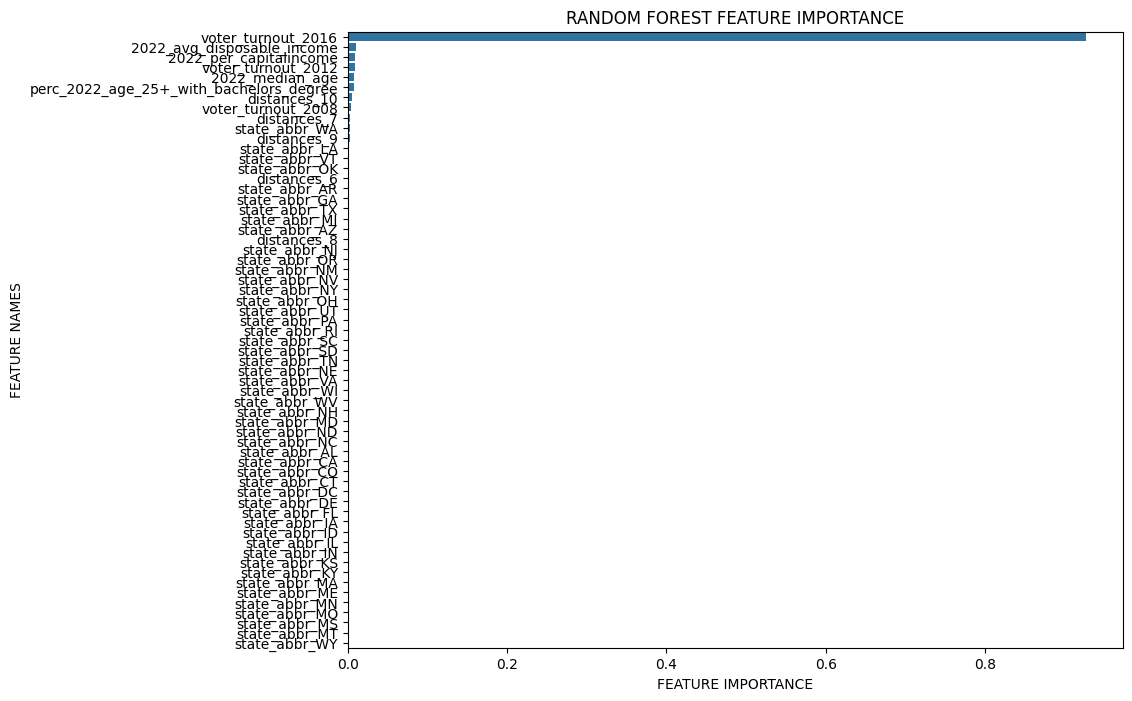

In [44]:
plot_feature_importance(rg5.best_estimator_.feature_importances_, X.columns,'DECISION TREE')

#### Analysis.

1. Voter turn out variables had the highest importance in the model. 

2. After normalisation, the model performace improved tremedeously, MEA droped from 0.03 in model 2 to 0.0034 in model 3 indicating the closenes between target and predictor varaiable increases.R2 score improved from 82% to 91%. 

3. Average disposable income and percapital income increased their effects on the model accounting for a significant rise. 

4. New variables distance and geographical location have little impact shown by their low significance. Distance to class 10 and class 9 cities has more importance than other distance variables.  

# Refine the Model.

Building a model is just among the first steps of machine learning. Refinement and tuning form a critcal step in achieving ones objective. From previuos models we have been modifying our models based on output performance i.e feature engineering and algorithm tuning. In the following steps we be adjusting the the variable inputs by eliminating those with no impact as observed from the feature importance chart, this also simplifies the model.

# Model 5. 

In [57]:
# Get featres from normalized data.
data5 = model3_data[['voter_turnout_2008', 'voter_turnout_2012', 'voter_turnout_2016', 'voter_turnout_2020', 
                     '2022_median_age', 'perc_2022_age_25+_with_bachelors_degree', '2022_per_capitalincome', 
                     '2022_avg_disposable_income', '2022_median_age', 'distances_10', 'distances_9',  
                     'state_abbr_CA', 'state_abbr_WA', 'state_abbr_AZ']]

# Define training features
X = data5.drop(columns='voter_turnout_2020')

# Define labels 
y = data5[['voter_turnout_2020']]


# Fit a decision tree regressor to the dataset 
parameters = {'max_depth':[7, 8, 10, 11, 12],
              'max_leaf_nodes': [60, 70, 80, 90, 100],
              'max_features':[26, 34, 44, 52, 60]}

# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=6)

rg6 = DecisionTreeRegressor()
rg6 = GridSearchCV(rg6, parameters)

# Train the model, fit the model ,gain knowledge of the data 
rg6.fit(X_train, y_train)

# Get the best parameters 
print(f'Best parameters : {rg6.best_params_} \n')

# Predict values using test and train data 
y_pred1 = rg6.predict(X_train)
y_pred = rg6.predict(X_test)


# Evaluation of model using MAE and R2 score 
t11 = mean_absolute_error(y_test, y_pred)
t12 = mean_absolute_error(y_train, y_pred1)

print(f'MAE of Decision Tree Regressor on test set : {t11}')
print(f'MAE of Decision Tree Regressor on train data : {t12} \n')

print(f'R2 Score on train data : {rg6.score(X_train,y_train)}')
print(f'R2 Score on test data : {rg6.score(X_test,y_test)}')

Best parameters : {'max_depth': 11, 'max_features': 26, 'max_leaf_nodes': 90} 

MAE of Decision Tree Regressor on test set : 0.0032278547081131008
MAE of Decision Tree Regressor on train data : 0.0026696868555639666 

R2 Score on train data : 0.9496606478263268
R2 Score on test data : 0.9080052647619702


#### References 

1. Find nearest point to layer - https://autogis-site.readthedocs.io/en/2019/notebooks/L3/nearest-neighbor-faster.html

2. Create custom points in matplotlib based on population - https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

3. Create link between geometry and point and plot - https://autogis-site.readthedocs.io/en/2019/notebooks/L3/nearest-neighbor-faster.html

4. Evaluation metrics - https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn#2

5. Customise map legend with matplotlib and geopandas - https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/

6. Colour pelets in matplotlib - https://matplotlib.org/stable/users/explain/colors/colormaps.html